In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

In [2]:
# this string must be passed during the execution of gillespie_test.exe
data_dir = '../data/prova/'

In [6]:
params = dict()

# parameters
params['betas'] = [1, 1.5]

# Gillespie parameters
params['end_cond'] = 'time'
params['max_steps'] = 100
#params['end_cond'] = 'passage'
#params['up_bounds'] = [2000,2000]
#params['low_bounds'] = [0,0]
params['traj_step'] = 1
params['init_state'] = [0] # Initial condition
params['N_real_moments'] = 1

In [7]:
ut.write_params(params, data_dir, 'param.txt')

In [13]:
av_traj, labels = ut.read_traj(data_dir+'moment_1.00.txt')
av_ts = av_traj[:,0]
av_xs = av_traj[:,2]

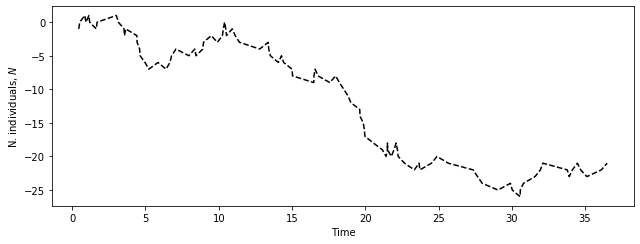

In [14]:
fig, (ax1) = plt.subplots(1,1,figsize=(9,3.5))

ax1.set_xlabel('Time')
ax1.set_ylabel('N. individuals, $N$')
ax1.plot(av_ts, av_xs, c='black', ls='--')



plt.tight_layout()

In [23]:
def N_weights(N, a, M, scale):
    aux1 = -2*N + 4*M/a*np.log(1+a+a*N/M)
    aux2 = -np.log(N/M) - np.log(1+a+a*N/M)
    return np.exp((aux1+aux2)-scale)

def N_weights_appr(N, a, M, scale):
    aux1 = -2*N + 4*M/a*np.log(1+a+a*N/M)
    return np.exp(aux1-scale)

def pN_approx(y,a,M):
    aux1 = -2*y*M + 4*M/a*np.log(1+a+a*y)
    auxZ = -2*M*(1/a-a) + np.log(np.pi*M/a)/2
    return np.exp(aux1-auxZ)

D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


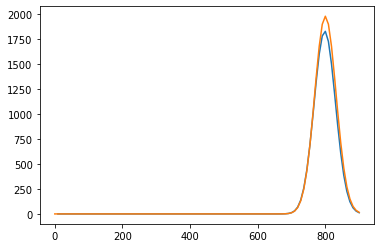

In [31]:
Ns = np.linspace(0,900,100)
plt.plot(Ns, N_weights(Ns, params['alpha'], params['M'],1163))
plt.plot(Ns, N_weights_appr(Ns, params['alpha'], params['M'],1165))

In [32]:
fin_states, labels = ut.read_traj(data_dir+'final_state.txt')
N_final = fin_states[:,1] + fin_states[:,2]

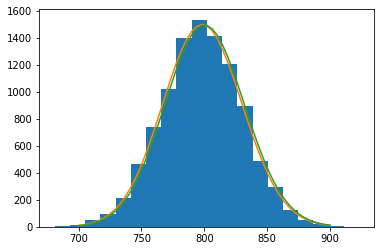

In [102]:
h = plt.hist(N_final, bins=20)
plt.plot(Ns, N_weights(Ns, params['alpha'], params['M'],1163.2))
plt.plot(Ns, N_weights_appr(Ns, params['alpha'], params['M'],1165.28))

In [36]:
def drift_x(x, N, params):
    auxR = (1 - params['alpha']*(1 + N/params['M']))
    auxN = (1 + params['alpha']*(1 + N/params['M']))
    return x * (1-x) * (params['betas'][0] - params['betas'][1]) * (auxR + auxN/N)

def drift_N(x, N, params):
    aux = (1 - params['alpha']*(1 + N/params['M']))
    R = params['betas'][0] * aux
    Rt = params['betas'][1] * aux
    return N * ( x*R + (1-x)*Rt )

In [57]:
def integrate(dt, drift_x, drift_N, init_x, init_N, max_time):
    traj_N, traj_x = [init_N], [init_x]
    t = 0
    while t < max_time:
        dN = drift_N(traj_x[-1], traj_N[-1], params) * dt
        dx = drift_x(traj_x[-1], traj_N[-1], params) * dt
        traj_N.append(traj_N[-1] + dN)
        traj_x.append(traj_x[-1] + dx)
        t += dt
    return traj_x, traj_N

In [58]:
traj_x, traj_N = integrate(0.01, drift_x, drift_N, 0.5, 400, 10)

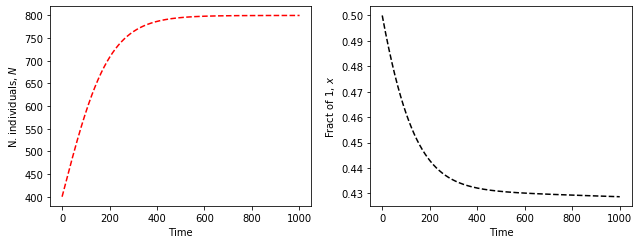

In [59]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(9,3.5))

ax1.set_xlabel('Time')
ax1.set_ylabel('N. individuals, $N$')
ax1.plot(traj_N, c='red', ls='--')


ax2.set_xlabel('Time')
ax2.set_ylabel('Fract of 1, $x$')
ax2.plot(traj_x, c='black', ls='--')

plt.tight_layout()